# Chapter 2. Key performance indicators and visualizations

## 2.1 KPIs to measure performances of different marketing efforts

As every marketing effort is associated with some costs, it is critical to look at the performances of marketing campaigns and track the return on investments (ROI) of marketing campaigns. 

### Sales revenue

**Attribution:** It is clear that the goal of every marketing effort is to generate and grow more revenue for the company. No company wants to spend more money on marketing than it generates. In order to correctly report the sales revenue, you will need to clearly define how you want to attribute sales to each of your marketing efforts. Some sales might come from email marketing campaigns, while some others might come from advertisements placed on TV or public transportation. Some sales could even come naturally, without any attributions to any of your marketing campaigns  

In order to correctly report how much sales revenue each of your marketing efforts drives, you will have to clearly define the rules to attribute your sales to each of your marketing efforts. For example, if you are an e-commerce company and promoting special offers through email and TV marketing campaigns, you might want to put a different URL in the email than the URL in your TV commercials. This way, you can identify and differentiate those sales from email marketing campaigns from those sales from marketing efforts through TV

Depending on your needs, you. might also want to report time-series sales revenue data

### Cost per acquisition (CPA)

Another way to look at the effectiveness of your marketing efforts is CPA. This KPI metric tells you how much it costs you to acquire a customer through your marketing efforts. A high CPA means it costs more to acquire a new customer, while a low CPA clearly means it costs less to acquire a new customer. Depending on the type of business, you can still have a very profitable marketing campaign with high CPA. For example, if you are selling a very luxurious and high-end product, where the pool of targeted customers is small and it costs more to acquire such customers, your CPA might be high, but the value of each customer you acquired might be even higher and result in a profitable marketing campaign.

The quality of customers acquired through highly-targeted marketing campaigns is many times better compared to non-targeted marketing campaigns 

### Digital marketing KPIs

**Click-through-rate (CTR):** 

the percentage of people who viewed your advertisement and then went on to click the advertisement.

CTR = Number of clicks / Number of views

CTR is an important measure in digital marketing channels as it measures how effective your online marketing is in brining traffic to your website

**Lead ratio:**

Measure how much of the website traffic can be converted into leads. Marketing qualified leads (MQL) are the leads that are ready to be marketed to and meet business-specific criteria to become customers who are likely to make purchases, based on their characteristics

**Conversion rate:**

The percentage of leads that are converted into active customers. You can define what should be considered as conversions based on your marketing goals. If your goal is to see what percentage of leads became paying customers, then you can compute the conversion rate somewhat similar to the formula: 

Conversion rate = Number of paying customer / Number of leads

If your goal is to see what percentage of leads signed up on your website, then you can compute the conversion rate as in the formula:

Conversion = Number of sign ups / Number of leads

## 2.2 Computing and visualizing KPIs using python

In [3]:
import pandas as pd

df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

In [8]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### Aggregate conversion rate

In [9]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [10]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


### Conversion rates by age

In [13]:
conversions_by_age = df.groupby(by = 'age')['conversion'].sum() / df.groupby(by = 'age')['conversion'].count() * 100.0
conversions_by_age.head()

age
17    40.000000
18    42.857143
19    47.619048
20    35.384615
21    28.431373
Name: conversion, dtype: float64

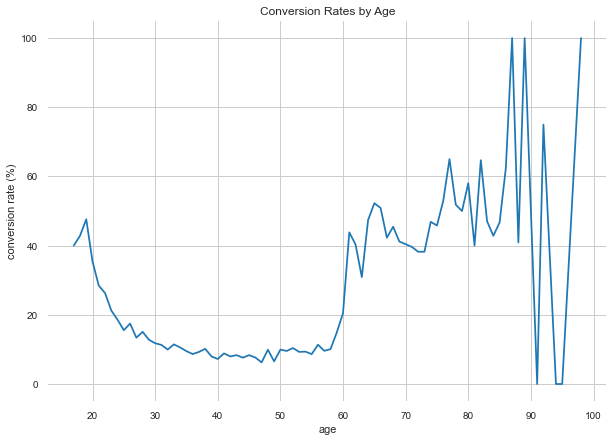

In [15]:
import matplotlib.pyplot as plt
ax = conversions_by_age.plot(grid = True, figsize = (10, 7), title = 'Conversion Rates by Age')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [20]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 
        else '[60, 70)' if x < 70 else '70+'
)
conversions_by_age_group = df.groupby(by = 'age_group')['conversion'].sum() / df.groupby(by = 'age_group')['conversion'].count() * 100.0
conversions_by_age_group

age_group
70+         47.121535
[18, 30)    16.263891
[30, 40)    10.125162
[40, 50)     7.923238
[50, 60)    10.157389
[60, 70)    34.668508
Name: conversion, dtype: float64

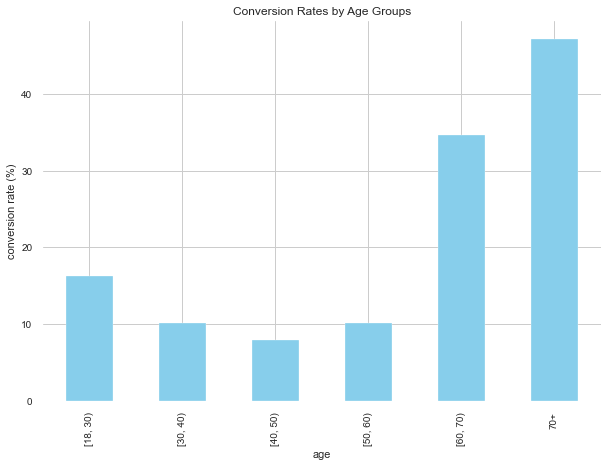

In [22]:
ax = conversions_by_age_group.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(
    kind = 'bar',
    color = 'skyblue',
    grid = True,
    figsize = (10, 7),
    title = 'Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

### Conversions versus non-conversions

In [24]:
conversions_by_marital_status_df = pd.pivot_table(df, values = 'y', index = 'marital', columns = 'conversion', aggfunc = len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


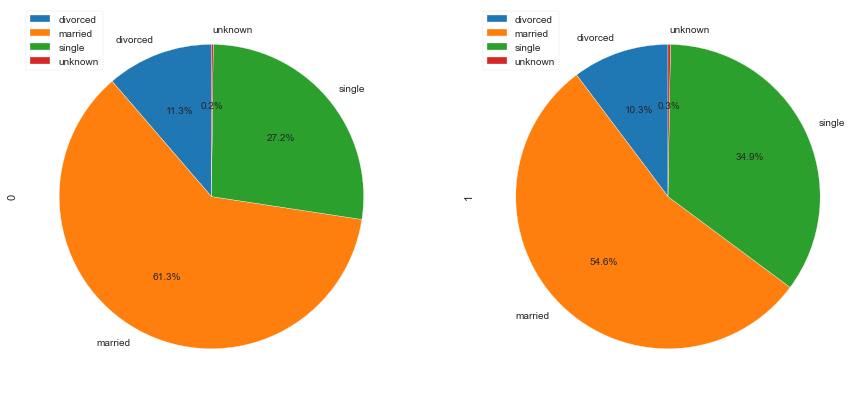

In [25]:
conversions_by_marital_status_df.plot(
    kind = 'pie',
    figsize = (15, 7),
    startangle = 90,
    subplots = True,
    autopct = lambda x: '%0.1f%%' % x
)
plt.show()

### Conversions by age and marital status

In [26]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df = age_marital_df.divide(
    df.groupby(by = 'age_group')['conversion'].count(),
    axis = 0
)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


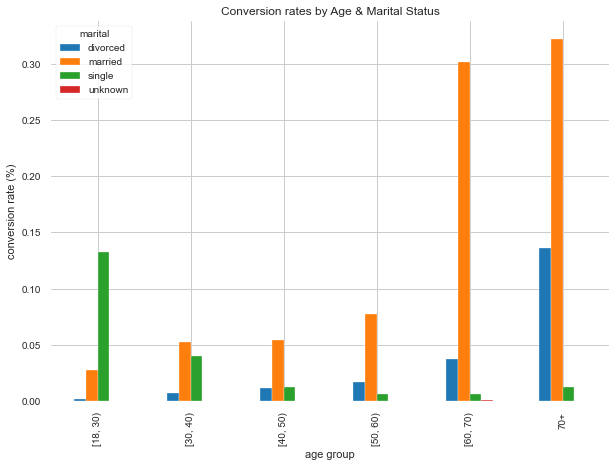

In [27]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(
    kind = 'bar',
    grid = True,
    figsize = (10, 7)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

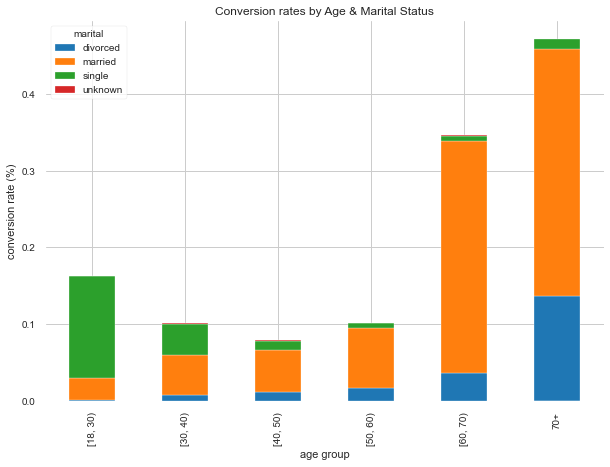

In [29]:
ax = age_marital_df.loc[['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']].plot(
    kind = 'bar',
    stacked = True,
    grid = True,
    figsize = (10, 7)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()

## 2.3 Computing and visualizing KPIs using R